In [1]:
import numpy as np
import pandas as pd
import lightgbm as lgb


In [187]:
data = pd.read_csv('train_spam.csv')
data['is_spam'] = data['text_type'] == 'spam'

–ü–æ—Å–º–æ—Ç—Ä–∏–º —Å–Ω–∞—á–∞–ª–∞ —Å –∫–∞–∫–∏–º–∏ –¥–∞–Ω–Ω—ã–º–∏ –º—ã —Ä–∞–±–æ—Ç–∞–µ–º

In [8]:
data['is_spam'].value_counts()

is_spam
False    11469
True      4809
Name: count, dtype: int64

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Å–∞–º—ã–µ —á–∞—Å—Ç—ã–µ —Å–ª–æ–≤–∞ –≤ –æ–±–æ–∏—Ö –∫–ª–∞—Å—Å–∞—Ö. –ü—Ä–∏ –∞–Ω–∞–ª–∏–∑–µ –Ω–µ –±—É–¥–µ–º —É—á–∏—Ç—ã–≤–∞—Ç—å —Å—Ç–æ–ø —Å–ª–æ–≤–∞ –∏–∑ –∞–Ω–≥–ª–∏–π—Å–∫–æ–≥–æ.

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/damircanysev/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/damircanysev/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


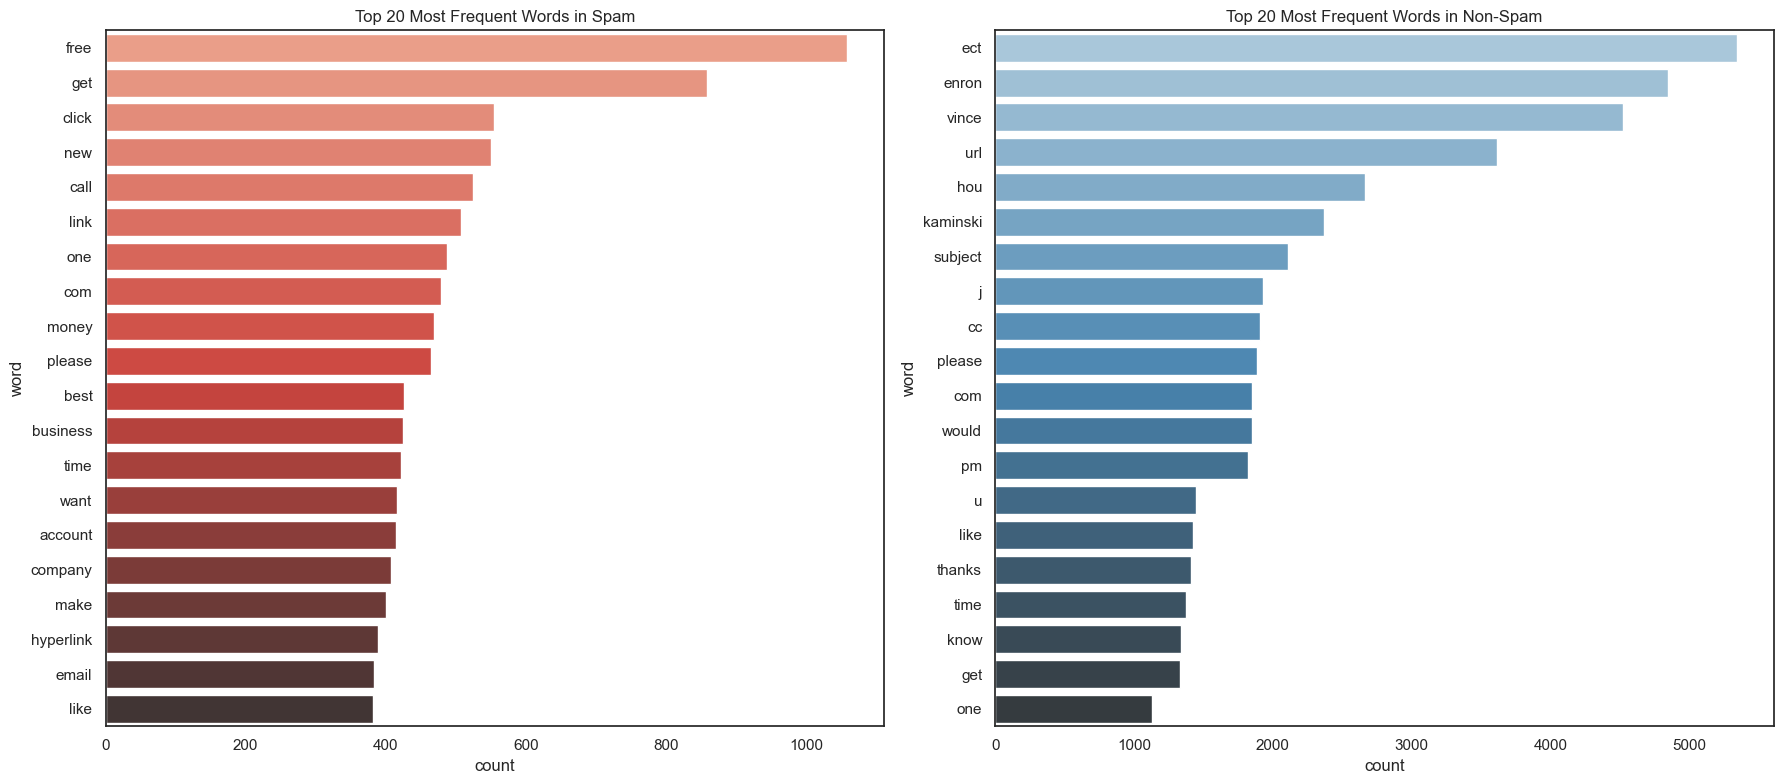

In [270]:
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

nltk.download('punkt')
nltk.download('stopwords')
from collections import Counter

stop_words = set(stopwords.words('english'))


def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    filtered_words = [word for word in tokens if
                      word.isalpha() and word not in stop_words]
    return filtered_words


data['tokens'] = data['text'].apply(preprocess_text)
spam_tokens = data[data['is_spam'] == True]['tokens'].sum()
non_spam_tokens = data[data['is_spam'] == False]['tokens'].sum()

spam_word_freq = Counter(spam_tokens)
non_spam_word_freq = Counter(non_spam_tokens)

spam_common_words = spam_word_freq.most_common(20)
non_spam_common_words = non_spam_word_freq.most_common(20)

df_spam_words = pd.DataFrame(spam_common_words, columns=['word', 'count'])
df_non_spam_words = pd.DataFrame(non_spam_common_words, columns=['word', 'count'])
plt.figure(figsize=(18, 8))

plt.subplot(1, 2, 1)
sns.barplot(x='count', y='word', data=df_spam_words, palette='Reds_d', hue='word')
plt.title('Top 20 Most Frequent Words in Spam')

plt.subplot(1, 2, 2)
sns.barplot(x='count', y='word', data=df_non_spam_words, palette='Blues_d', hue='word')
plt.title('Top 20 Most Frequent Words in Non-Spam')

plt.tight_layout()
plt.show()

–ó–¥–µ—Å—å —Å—Ç–∞–Ω–æ–≤–∏—Ç—Å—è –ø–æ–Ω—è—Ç–Ω–æ, —á—Ç–æ —á–∞—Å—Ç–æ –ø–∏—Å—å–º–∞ —Å–æ–¥–µ—Ä–∂–∞—Ç –∫–∞–∫–æ–π-—Ç–æ –Ω–µ –æ—á–µ–Ω—å —Å–≤—è–∑–Ω—ã–π —Ç–µ–∫—Å—Ç –∏ –∫–∞–∫ –±—É–¥—Ç–æ –±—ã–ª–∏ —Å–≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞–Ω—ã –Ω–µ –æ—á–µ–Ω—å —É–º–Ω–æ–π —è–∑—ã–∫–æ–≤–æ–π –º–æ–¥–µ–ª—å—é, –∫–æ—Ç–æ—Ä–∞—è –æ—á–µ–Ω—å –ª—é–±–∏—Ç –í–∏–Ω—Å–µ—Ç–∞ –ö–∞–º–∏–Ω—å—Å–∫–∏. –í–æ–∑–º–æ–∂–Ω–æ, —ç—Ç–æ –±—ã–ª–æ —Å–¥–µ–ª–∞–Ω–æ —Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ, —á—Ç–æ–±—ã –±—ã–ª–æ –ø—Ä–æ—â–µ –æ–±—É—á–∏—Ç—å –º–æ–¥–µ–ª—å.

----
–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–ª–∏–Ω—ã –ø–∏—Å–µ–º –≤ –æ–±–æ–∏—Ö –∫–ª–∞—Å—Å–∞—Ö

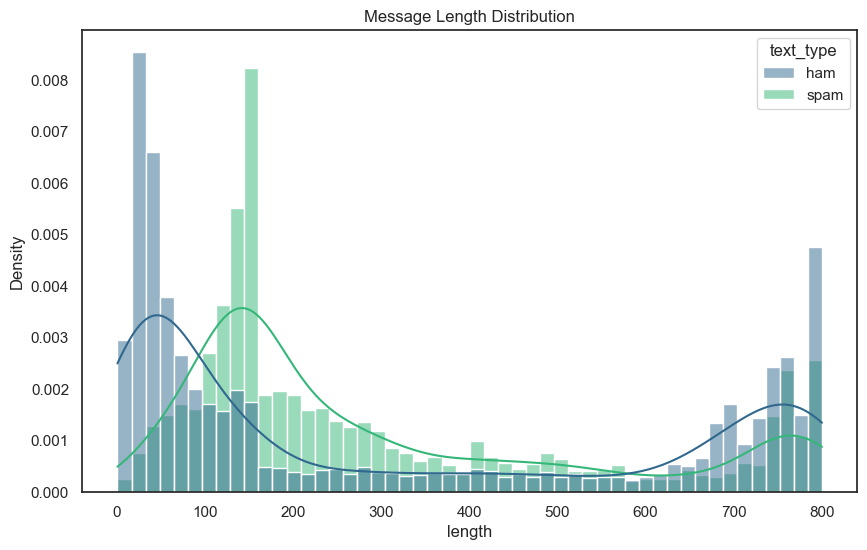

In [253]:
def add_length(df):
    df['length'] = df['text'].apply(len)


add_length(data)
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='length', hue='text_type', bins=50, kde=True, palette='viridis', stat='density',
             common_norm=False)
plt.title('Message Length Distribution')
plt.show()

–ü–æ—Ö–æ–∂–µ –Ω–∞ –±–∏–º–æ–¥–∞–ª—å–Ω–æ–µ. –í–∏–¥–Ω–æ, —á—Ç–æ –ø–∏–∫–∏ —É –∫–ª–∞—Å—Å–æ–≤ —Ä–∞–∑–ª–∏—á–∞—é—Ç—Å—è -- —ç—Ç–æ —Ö–æ—Ä–æ—à–æ –∏ –≤ –ø—Ä–∏–Ω—Ü–∏–ø–µ –º–æ–∂–Ω–æ –æ–±—ä—è—Å–Ω–∏—Ç—å: —á–∞—â–µ –≤—Å–µ–≥–æ –≤ —Å–ø–∞–º –ø–∏—Å—å–º–∞—Ö –Ω—É–∂–Ω–æ –≤–≤–æ–¥–∏—Ç—å —á–∏—Ç–∞—é—â–µ–≥–æ –≤ –∫–æ–Ω—Ç–µ–∫—Å—Ç, –æ–±—ã—á–Ω–æ–µ –∂–µ –ø–∏—Å—å–º–æ –º–æ–∂–µ—Ç –±—ã—Ç—å —á–∞—Å—Ç—å—é –ø–µ—Ä–µ–ø–∏—Å–∫–∏, –∏–∑-–∑–∞ —á–µ–≥–æ –≤ —ç—Ç–æ–º –∫–ª–∞—Å—Å–µ –±—É–¥–µ—Ç –±–æ–ª—å—à–µ –∫–æ—Ä–æ—Ç–∫–∏—Ö –ø–∏—Å–µ–º

----
–¢–µ–ø–µ—Ä—å –ø–æ—Å—á–∏—Ç–∞–µ–º –ø–æ–ª—è—Ä–Ω–æ—Å—Ç—å –ø–∏—Å–µ–º. –≠—Ç–æ –¥–µ–ª–∞–µ—Ç—Å—è –ø—É—Ç–µ–º —Å–æ–ø–æ—Å—Ç–∞–≤–ª–µ–Ω–∏—è –∫–∞–∂–¥–æ–º—É —Å–ª–æ–≤—É –æ—Ü–µ–Ω–∫–∏ –µ–≥–æ –ø–æ–ª—è—Ä–Ω–æ—Å—Ç–∏. –ü–æ—Ç–æ–º —Å—á–∏—Ç–∞–µ—Ç—Å—è —Å—É–º–º–∞—Ö –ø–æ –≤—Å–µ–º—É —Ç–µ–∫—Å—Ç—É –∏ –Ω–æ—Ä–º–∞–ª–∏–∑—É–µ—Ç—Å—è –Ω–∞ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ä–∞—Å–ø–æ–∑–Ω–∞–Ω–Ω—ã—Ö —Ç–æ–∫–µ–Ω–æ–≤. 

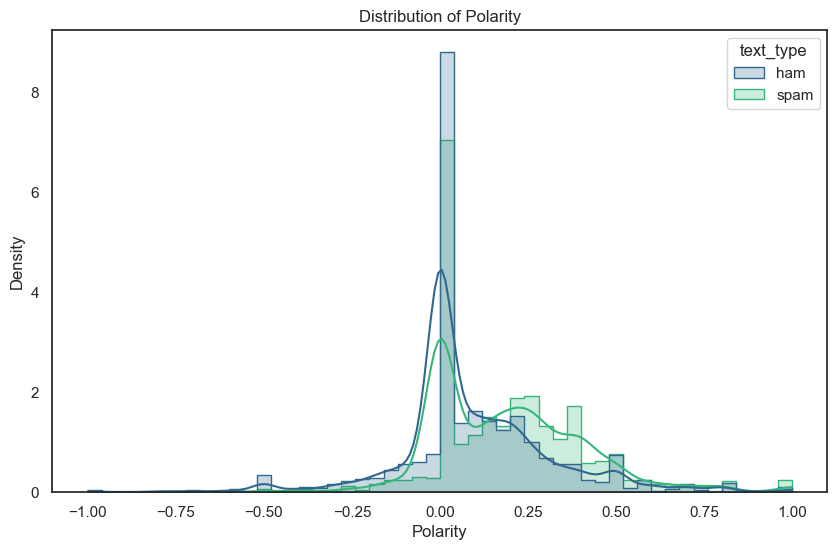

In [290]:
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob


def get_polarity(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity


def add_polarity(df):
    df['polarity'] = df['text'].apply(get_polarity)


add_polarity(data)

plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='polarity', hue='text_type', element='step', palette='viridis', kde=True, bins=50,
             stat='density', common_norm=False)
plt.title('Distribution of Polarity')
plt.xlabel('Polarity')
plt.ylabel('Density')
plt.show()

In [16]:
average_sentiment = data.groupby('text_type')['polarity'].mean()
average_sentiment

text_type
ham     0.093369
spam    0.190594
Name: polarity, dtype: float64

–í–∏–¥–Ω–æ, —á—Ç–æ —Ä–∞–∑–Ω–∏—Ü–∞ –º–µ–∂–¥—É –∫–ª–∞—Å—Å–∞–º–∏ —Ç–æ–∂–µ –Ω–∞–±–ª—é–¥–∞–µ—Ç—Å—è.
–° –ø–æ–º–æ—â—å—é `textblob` –º–æ–∂–Ω–æ –ø–æ—Å—á–∏—Ç–∞—Ç—å –µ—â–µ –Ω–µ—Å–∫–æ–ª—å–∫–æ –ø–æ–ª–µ–∑–Ω—ã—Ö —Ñ–∏—á–µ–π, –Ω–∞–ø—Ä–∏–º–µ—Ä –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –≥–ª–∞–≥–æ–ª–æ–≤, —Å—É—â–µ—Å—Ç–≤–∏—Ç–µ–ª—å–Ω—ã—Ö, –ø—Ä–∏–ª–∞–≥–∞—Ç–µ–ª—å–Ω—ã—Ö, —Å—É–±—ä–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç—å (—Å—á–∏—Ç–∞–µ—Ç—Å—è —Ç–µ–º –∂–µ –æ–±—Ä–∞–∑–æ–º —á—Ç–æ –∏ –ø–æ–ª—è—Ä–Ω–æ—Å—Ç—å)

In [254]:
def extract_features(text):
    blob = TextBlob(text)
    pos_counts = {'NN': 0, 'VB': 0, 'JJ': 0}
    for word, pos in blob.tags:
        if pos.startswith('NN'):
            pos_counts['NN'] += 1
        elif pos.startswith('VB'):
            pos_counts['VB'] += 1
        elif pos.startswith('JJ'):
            pos_counts['JJ'] += 1

    words = blob.words.lower()
    ttr = len(set(words)) / len(words) if words else 0

    subjectivity = blob.sentiment.subjectivity

    return pos_counts['NN'], pos_counts['VB'], pos_counts['JJ'], len(words), ttr, subjectivity


def add_textblob_features(df):
    df[['noun_count', 'verb_count', 'adj_count', 'words_count', 'ttr', 'subjectivity']] = data[
        'text'].apply(lambda x: pd.Series(extract_features(x)))
    for count_var in ['noun', 'verb', 'adj']:
        var = f'{count_var}_count'
        ratio_var = f'{count_var}_ratio'
        df[ratio_var] = df[var] / df['words_count']


add_textblob_features(data)

In [255]:
features = ['noun_ratio', 'verb_ratio', 'adj_ratio', 'ttr', 'subjectivity']

mean_features = data.groupby('text_type')[features].mean()
print(mean_features)

           noun_ratio  verb_ratio  adj_ratio       ttr  subjectivity
text_type                                                           
ham          0.346384    0.179941   0.101375  0.832656      0.347081
spam         0.414793    0.142764   0.107710  0.847966      0.395462


–¢–µ–ø–µ—Ä—å –ø–æ–∏–∑—É—á–∞–µ–º —Ç–µ–∫—Å—Ç –Ω–∞ –Ω–∞–ª–∏—á–∏–µ –∫–æ–Ω–∫—Ä–µ—Ç–Ω—ã—Ö –ø–∞—Ç—Ç–µ—Ä–Ω–æ–≤, –Ω–∞–ø—Ä–∏–º–µ—Ä –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–º–∞–π–ª–∏–∫–æ–≤, —á–∏—Å–µ–ª –∏ —Å—Å—ã–ª–æ–∫ –≤ –æ–±–æ–∏—Ö –∫–ª–∞—Å—Å–∞—Ö. –ú—ã –±—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å TfidfVectorizer, –∫–æ—Ç–æ—Ä—ã–π –Ω–µ —Å–º–æ–∂–µ—Ç —É—Ö–≤–∞—Ç–∏—Ç—å —Ç–∞–∫–∏–µ —Ñ–∏—á–∏

In [321]:
import re
import emoji


def count_urls(text):
    return len(re.findall(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', text))


def count_handles(text):
    return len(re.findall('@[\d\w]+', text))


def count_numbers(text):
    return len(re.findall(r'\d+', text))


def caps_proportion(text):
    if len(text) == 0:
        return 0
    else:
        return sum(1 for c in text if c.isupper()) / len(text)


def count_currency_symbols(text):
    pattern = r'[\$\‚Ç¨\¬£\¬•]'
    return len(re.findall(pattern, text))


def count_emojis(text):
    return sum(1 for _ in emoji.emoji_list(text))


def punctuation_count(text):
    punctuations = "!\"#$%&'()*+,-./:;<=>?@[\\]^_`{|}~"
    return sum(1 for char in text if char in punctuations)


stop_words = set(stopwords.words('english'))


def stop_words_count(text):
    words = text.split()
    return sum(1 for word in words if word.lower() in stop_words)


def add_pattern_features(df):
    df['url_count'] = df['text'].apply(count_urls)
    df['number_count'] = df['text'].apply(count_numbers)
    df['caps_proportion'] = df['text'].apply(caps_proportion)
    df['emoji_count'] = df['text'].apply(count_emojis)
    df['emoji_ratio'] = df['emoji_count'] / df['length']
    df['handle_count'] = df['text'].apply(count_handles)
    df['currency_count'] = df['text'].apply(count_currency_symbols)
    df['punctuation_count'] = df['text'].apply(punctuation_count)
    df['stop_words_count'] = df['text'].apply(stop_words_count)
    df['tokens_count'] = df['text'].apply(lambda x: len(x.split()))
    df['stop_words_ratio'] = df['stop_words_count'] / df['tokens_count']
    df['punctuation_ratio'] = df['punctuation_count'] / df['length']
    df['number_ratio'] = df['number_count'] / df['tokens_count']


add_pattern_features(data)

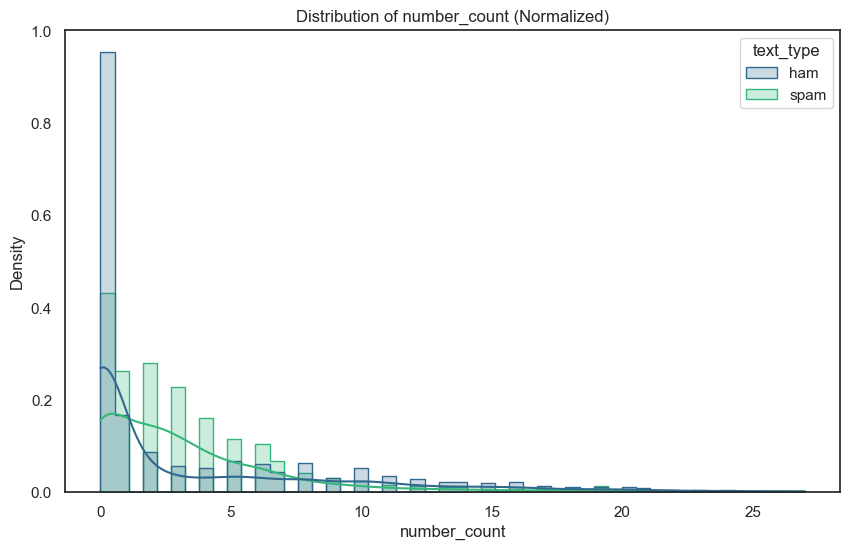

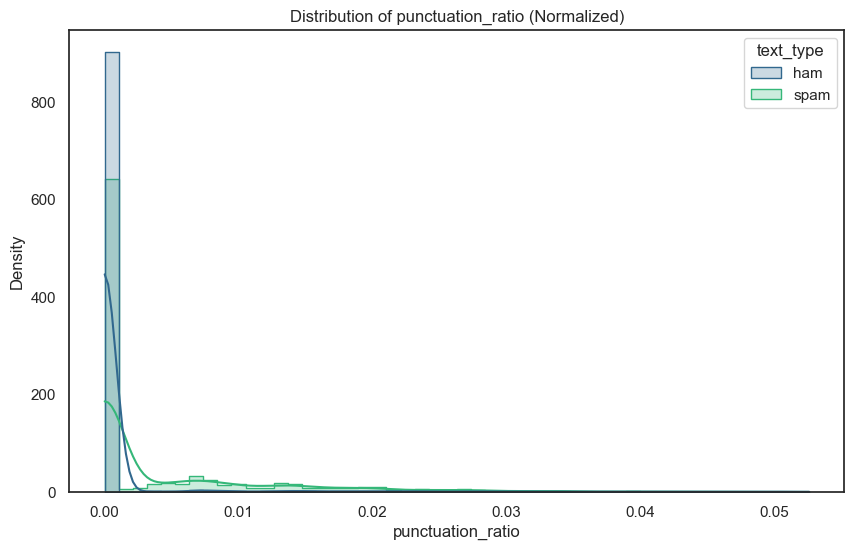

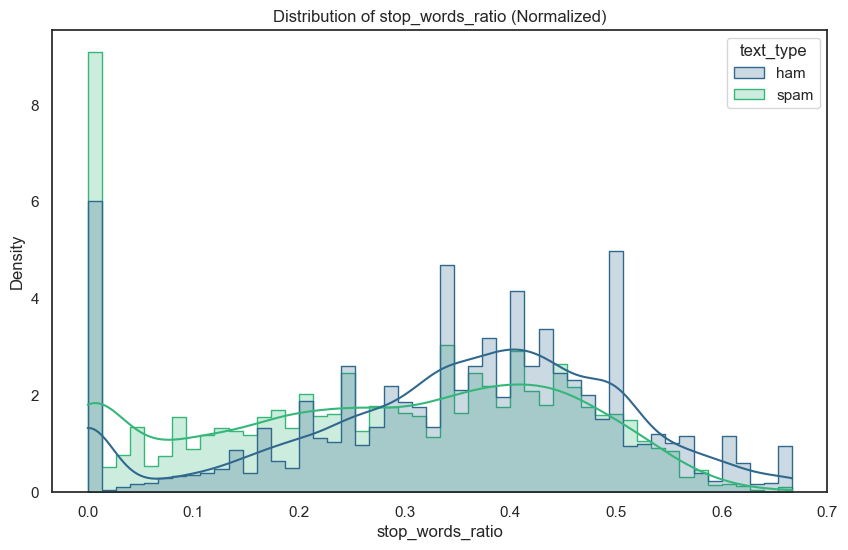

In [257]:
for feature in ['number_count', 'punctuation_ratio', 'stop_words_ratio']:
    plt.figure(figsize=(10, 6))
    subset = data[data[feature] <= data[feature].quantile(0.99)]
    sns.histplot(data=subset, x=feature, hue='text_type', element='step', palette='viridis', kde=True, bins=50,
                 stat='density', common_norm=False)
    plt.title(f'Distribution of {feature} (Normalized)')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.show()

In [322]:
features = ['number_count', 'caps_proportion', 'emoji_count', 'url_count', 'handle_count', 'currency_count',
            'punctuation_ratio', 'stop_words_ratio', 'emoji_ratio']
mean_features = data.groupby('text_type')[features].mean()
print(mean_features)

           number_count  caps_proportion  emoji_count  url_count  \
text_type                                                          
ham            3.774087         0.000239     0.021100   0.000000   
spam           3.972136         0.004142     2.418798   0.000208   

           handle_count  currency_count  punctuation_ratio  stop_words_ratio  \
text_type                                                                      
ham            0.008545        0.002267           0.002509          0.353083   
spam           0.150135        0.221460           0.004448          0.277788   

           emoji_ratio  
text_type               
ham           0.000749  
spam          0.010179  


–í–∏–¥–Ω–æ —á—Ç–æ –≤ —Å–ø–∞–º–µ –±–æ–ª—å—à–µ —Ü–∏—Ñ—Ä, —Å–º–∞–π–ª–∏–∫–æ–≤ –∏ —É—Ä–ª–æ–≤, –æ—Ç–Ω–æ—à–µ–Ω–∏–µ –∑–∞–≥–ª–∞–≤–Ω—ã—Ö –±—É–∫–≤ –∫ –ø—Ä–æ–ø–∏—Å–Ω—ã–º —Ç–æ–∂–µ –≤—ã—à–µ

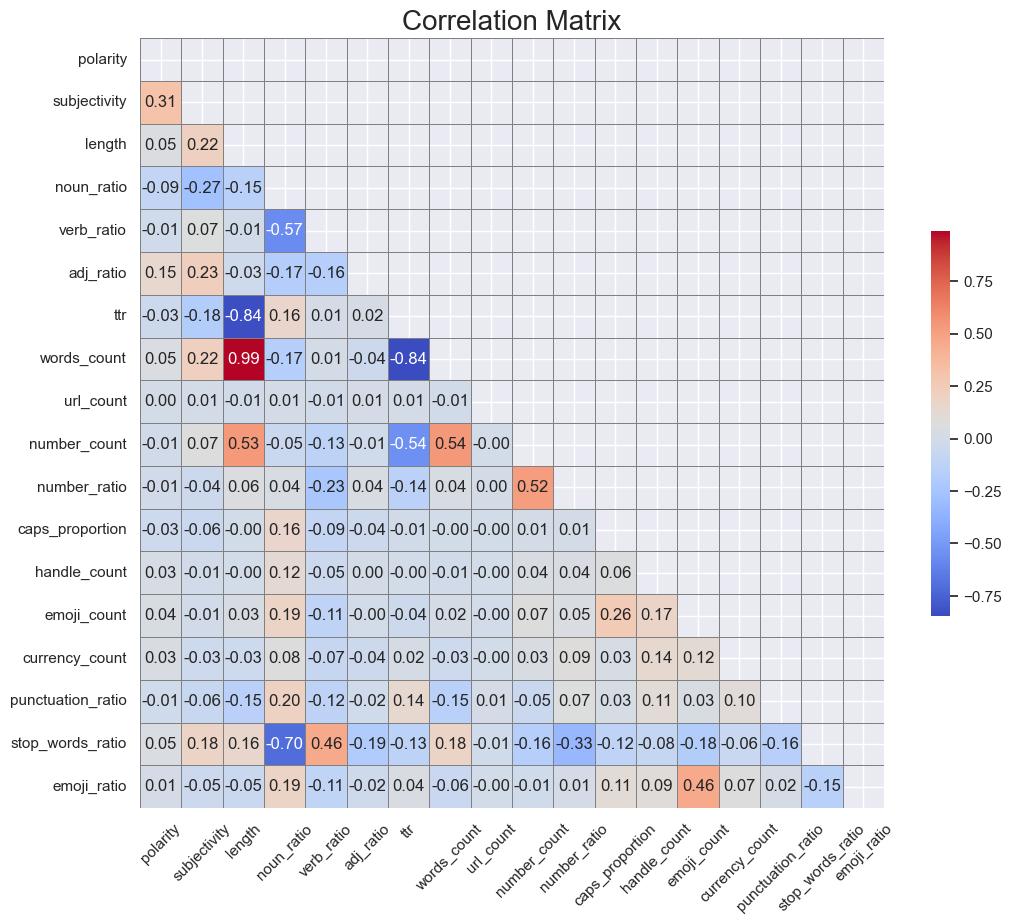

In [323]:
all_features = ['polarity', 'subjectivity', 'length', 'noun_ratio', 'verb_ratio', 'adj_ratio', 'ttr', 'words_count',
                'url_count', 'number_count', 'number_ratio', 'caps_proportion', 'handle_count', 'emoji_count',
                'currency_count', 'punctuation_ratio', 'stop_words_ratio', 'emoji_ratio']


def plot_feature_correlation_matrix(features):
    correlation_matrix = data[features].corr()

    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm',
                cbar_kws={'shrink': .5}, linewidths=.5, linecolor='gray')
    plt.title('Correlation Matrix', fontsize=20)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.show()


plot_feature_correlation_matrix(all_features)

–í—ã–∫–∏–Ω–µ–º –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ —Ñ–∏—á–∏ —Å –±–æ–ª—å—à–æ–π –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–µ–π.

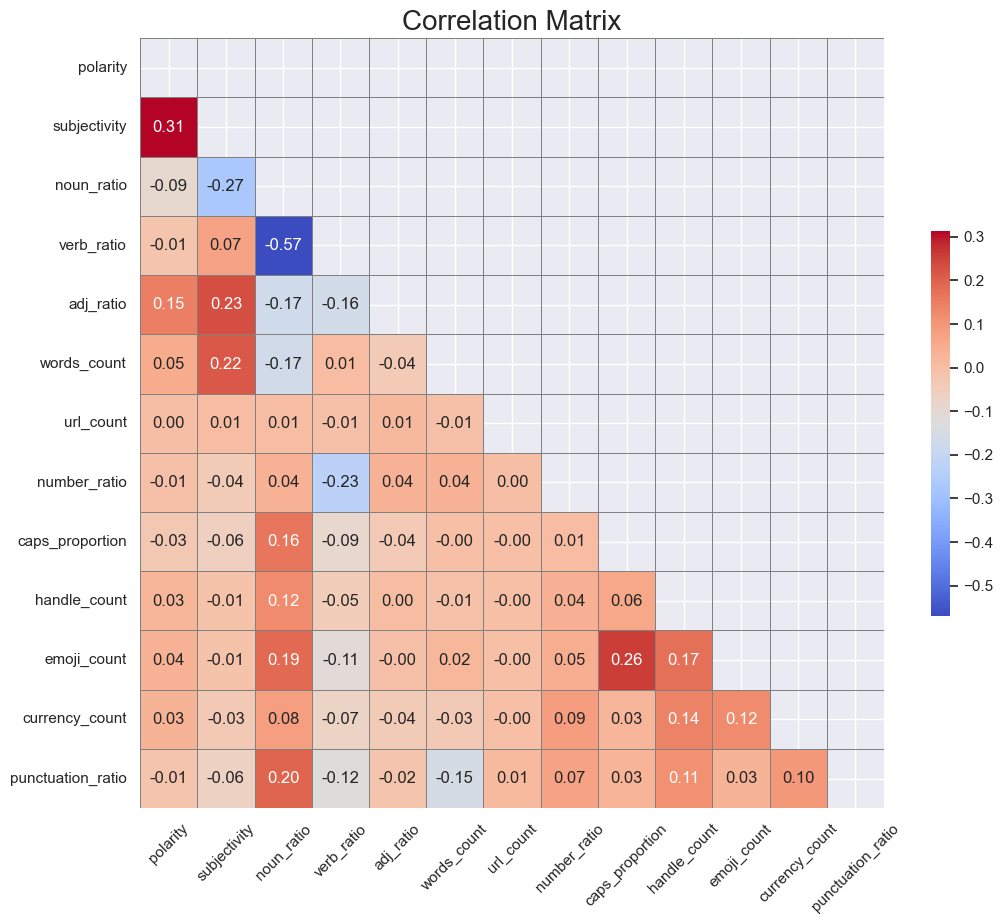

In [359]:
no_text_features = ['polarity', 'subjectivity', 'noun_ratio', 'verb_ratio', 'adj_ratio', 'words_count',
                    'url_count', 'number_ratio', 'caps_proportion', 'handle_count', 'emoji_count', 'currency_count',
                    'punctuation_ratio']
plot_feature_correlation_matrix(no_text_features)

----
–û–±—É—á–∏–º —á—Ç–æ-–Ω–∏–±—É–¥—å

In [185]:
data.head(10)

text_type                                               text  is_spam  \
0       ham  make sure alex knows his birthday is over in f...    False   
1       ham  a resume for john lavorato thanks vince i will...    False   
2      spam  plzz visit my website moviesgodml to get all m...     True   
3      spam  urgent your mobile number has been awarded wit...     True   
4       ham  overview of hr associates analyst project per ...    False   
5      spam  i am so greatful to mrs valerie dodson for hel...     True   
6       ham  url url date not supplied government employees...    False   
7      spam  welcome to jefferson pilot s gateway to wealth...     True   
8       ham  looks like your ham corpus by and large has to...    False   
9       ham  how are you with moneyas in to youmoney aint a...    False   

   url_count  number_count  caps_proportion  emoji_count  handle_count  \
0          0             0              0.0            0             0   
1          0             5              0.0            0             0   
2          0             0              0.0            5             0   
3          0             5              0.0            0             0   
4          0             5              0.0            0             0   
5          0             0              0.0            0             0   
6          0             0              0.0            0             0   
7          0             0              0.0            0             0   
8          0             0              0.0            0             0   
9          0             0              0.0            0             0   

                                              tokens  length  ...  \
0  [make, sure, alex, knows, birthday, fifteen, m...      86  ...   
1  [resume, john, lavorato, thanks, vince, get, m...     520  ...   
2  [plzz, visit, website, moviesgodml, get, movie...     126  ...   
3  [urgent, mobile, number, awarded, prize, guara...     139  ...   
4  [overview, hr, associates, analyst, project, p...     733  ...   
5  [greatful, mrs, valerie, dodson, helping, chan...     183  ...   
6  [url, url, date, supplied, government, employe...     156  ...   
7  [welcome, jefferson, pilot, gateway, wealth, o...     800  ...   
8  [looks, like, ham, corpus, large, jeremy, url,...     419  ...   
9           [moneyas, youmoney, aint, thinghow, sha]      67  ...   

   subjectivity  noun_ratio  verb_ratio  adj_ratio  currency_count  \
0      0.944444    0.187500    0.250000   0.187500               0   
1      0.399824    0.391753    0.134021   0.092784               0   
2      0.600000    0.318182    0.136364   0.181818               0   
3      1.000000    0.260870    0.173913   0.173913               1   
4      0.394015    0.472441    0.157480   0.102362               0   
5      0.629293    0.303030    0.181818   0.090909               0   
6      0.200000    0.307692    0.192308   0.192308               0   
7      0.488655    0.325397    0.166667   0.126984               0   
8      0.622449    0.282353    0.152941   0.094118               0   
9      0.000000    0.214286    0.285714   0.000000               0   

   punctuation_count  stop_words_count  tokens_count  stop_words_ratio  \
0                  0                 6            16          0.375000   
1                  0                33            97          0.340206   
2                  0                 8            22          0.363636   
3                  0                 7            23          0.304348   
4                  0                28           127          0.220472   
5                  0                15            33          0.454545   
6                  0                 9            26          0.346154   
7                  0                49           126          0.388889   
8                  0                43            85          0.505882   
9                  0                 9            14          0.642857   

   punctuation_

In [360]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from scipy.sparse import csr_matrix

features = no_text_features + ['text']

X = data[features]
y = data['is_spam']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=52)

vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)


def add_vectorizer_features(x, vectorizer):
    x_text = vectorizer.transform(x['text'])
    x_numeric = x.drop('text', axis=1).values
    x_sparse = csr_matrix(x_numeric)
    return hstack([x_sparse, x_text])


vectorizer.fit_transform(X_train['text'])
X_train = add_vectorizer_features(X_train, vectorizer)
X_test = add_vectorizer_features(X_test, vectorizer)

## Log Reg

In [361]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

log_reg = LogisticRegression(random_state=52, solver='liblinear')
log_reg.fit(X_train, y_train)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.9833069881914458


## Random Forest

In [362]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=500, random_state=52)
random_forest.fit(X_train, y_train)
y_pred_proba = random_forest.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.986835868625559


## GBM

In [363]:
lgb_train = lgb.Dataset(X_train, label=y_train)
lgb_test = lgb.Dataset(X_test, label=y_test, reference=lgb_train)

params = {
    'objective': 'binary',
    'metric': 'auc',
    'verbosity': -1,
    'boosting_type': 'gbdt',
    'is_unbalance': True,
}

gbm = lgb.train(params, lgb_train, valid_sets=lgb_test, num_boost_round=500)
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)

roc_auc = roc_auc_score(y_test, y_pred)
print(f'ROC-AUC: {roc_auc}')

ROC-AUC: 0.9897206046381136


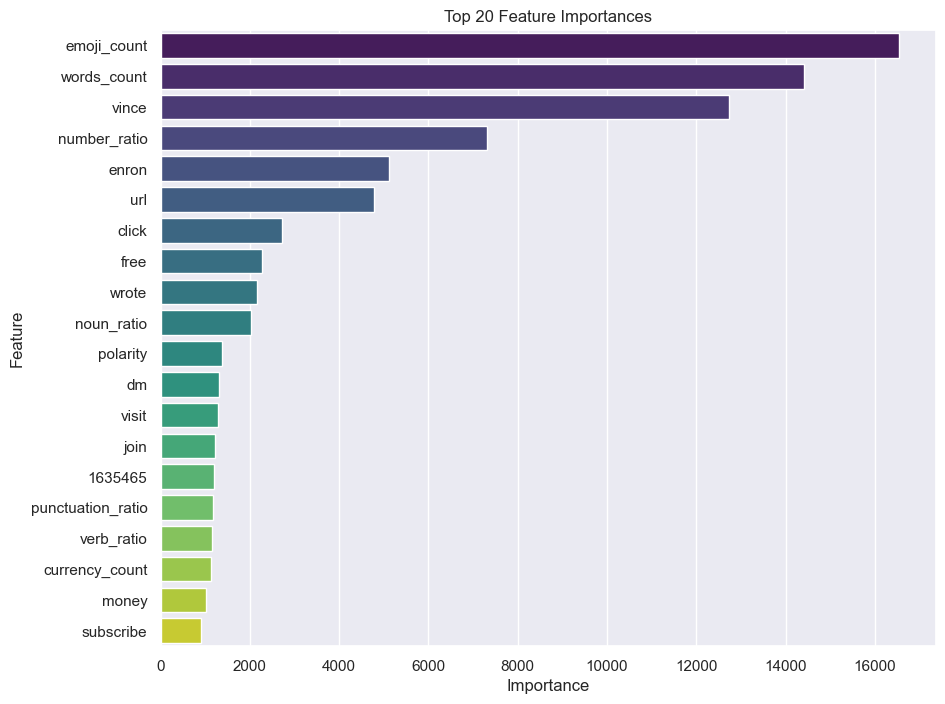

In [364]:
feature_importances = gbm.feature_importance(importance_type='gain')
feature_names = vectorizer.get_feature_names_out().tolist()

feature_names = no_text_features + feature_names

assert len(feature_importances) == len(feature_names)

importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(data=importances_df.head(20), x='Importance', y='Feature', palette='viridis', hue='Feature')
plt.title('Top 20 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

–ï—â–µ —Ä–∞–∑ –º–æ–∂–Ω–æ –∑–∞–º–µ—Ç–∏—Ç—å —Å–∏–Ω—Ç–µ—Ç–∏—á–µ—Å–∫—É—é –ø—Ä–∏—Ä–æ–¥—É —Ç–µ–∫—Å—Ç–æ–≤ –ø–æ vince –∏ enron. –û–±–∞ —Å–ª–æ–≤–∞ –≤—Ö–æ–¥—è—Ç –≤ —Ç—Ä–æ–π–∫—É —Å–∞–º—ã—Ö —á–∞—Å—Ç—ã—Ö —Å–ª–æ–≤ –∏–∑ –Ω–µ-—Å–ø–∞–º –ø–∏—Å–µ–º

–ü–æ—Å—á–∏—Ç–∞–µ–º –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é –º–µ–∂–¥—É –ø—Ä–µ–¥–∏–∫—Ç–∞–º–∏ –∏ —Å–æ–±–µ—Ä–µ–º –ø—Ä–æ—Å—Ç–æ–π –∞–Ω—Å–∞–º–±–ª—å

In [365]:
rf_preds = random_forest.predict_proba(X_test)[:, 1]
log_reg_preds = log_reg.predict_proba(X_test)[:, 1]
lgbm_preds = gbm.predict(X_test)
predictions = np.vstack([rf_preds, log_reg_preds, lgbm_preds])
correlation_matrix = np.corrcoef(predictions)
correlation_matrix

array([[1.        , 0.93845791, 0.94722257],
       [0.93845791, 1.        , 0.91573852],
       [0.94722257, 0.91573852, 1.        ]])

In [366]:
def predict(rf_model, logreg_model, gbm_model, x):
    rf_preds = rf_model.predict_proba(x)[:, 1]
    log_reg_preds = logreg_model.predict_proba(x)[:, 1]
    lgbm_preds = gbm_model.predict(x)
    sum_preds = (rf_preds + log_reg_preds + lgbm_preds) / 3
    return sum_preds

In [367]:
preds = predict(random_forest, log_reg, gbm, X_test)
roc_auc = roc_auc_score(y_test, preds)
print(f'ROC-AUC: {roc_auc}')

ROC-AUC: 0.9908551564627712


–î–∞–∂–µ —Å —Ç–∞–∫–∏–º –ø—Ä–æ—Å—Ç—ã–º –∞–Ω—Å–∞–º–±–ª–µ–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç —É–ª—É—á—à–∏–ª—Å—è

----
–ü–æ—Å–º–æ—Ç—Ä–∏–º, –≥–¥–µ –º–æ–¥–µ–ª—å –æ—à–∏–±–ª–∞—Å—å

In [368]:
y_pred = (preds > 0.5).astype(int)
results = pd.DataFrame({'actual': y_test, 'predicted': y_pred.flatten()})
misclassified = results[results['actual'] != results['predicted']]
data.loc[misclassified.index][['text_type', 'text']].head(15)

text_type                                               text
2684       spam  add logos and tones to your cell phone 1575332...
12660      spam  upside pressure signals institutional interest...
9586       spam                     need instagram followers likes
5891        ham  the february issue of reactions is now live on...
1420       spam                       85233 freeringtonereply real
9883       spam                                     dating online?
2503       spam  heatt kills hello cbs a mythicize p news a r o...
9209       spam                                           join now
12246       ham  with an investment of 500 you will earn 10000 ...
2215        ham  important news my heart4 sale 100discount plzi...
13453      spam  hi anybody poor in referring need a legit and ...
3729       spam  may this day bring to u all things that make u...
4686       spam  pratham invites you for parent counseling on o...
7517       spam  nova medical centers conducts a shoulder pain ...
229         ham                 ps i have won 2 national debates üòç

–¢–µ–∫—É—â–∏–µ –º–æ–¥–µ–ª–∏ –Ω–µ –∑–Ω–∞—é—Ç –Ω–∏—á–µ–≥–æ –ø—Ä–æ —Å–µ–º–∞–Ω—Ç–∏—á–µ—Å–∫—É—é —Ä–æ–ª—å –∫–∞–∂–¥–æ–≥–æ —Ç–æ–∫–µ–Ω–∞. –¢–∞–∫ –∫–∞–∫ –º—ã –∏—Å–ø–æ–ª—å–∑—É–µ–º TfidfVectorizer, –æ–Ω–∏ –æ—Ä–∏–µ–Ω—Ç–∏—Ä—É—é—Ç—Å—è –Ω–∞ —á–∞—Å—Ç–æ—Ç—É —Å–ª–æ–≤. –í —Å–ª—É—á–∞—è—Ö –≤—ã—à–µ –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ –ø–∏—Å—å–º–∞ –º–æ–∂–Ω–æ –±—ã–ª–æ –±—ã –æ–±—Ä–∞–±–æ—Ç–∞—Ç—å –ø—Ä–∞–≤–∏–ª—å–Ω–æ, –µ—Å–ª–∏ —É—á–∏—Ç—ã–≤–∞—Ç—å —Å–º—ã—Å–ª —Ç–µ–∫—Å—Ç–∞. –ü–æ–ø—Ä–æ–±—É–µ–º –æ–±—É—á–∏—Ç—å LSTM –º–æ–¥–µ–ª—å –¥–ª—è —ç—Ç–æ–≥–æ

## LSTM

In [125]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, concatenate

additional_features = no_text_features

X_train, X_test, y_train, y_test = train_test_split(data, data['is_spam'], test_size=0.2, random_state=52)

max_sequence_length = 100
vocabulary_size = 10000
tokenizer = Tokenizer(num_words=vocabulary_size)
tokenizer.fit_on_texts(X_train['text'])
X_train_sequences = tokenizer.texts_to_sequences(X_train['text'])
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length)
scaler = StandardScaler()
X_train_additional = scaler.fit_transform(X_train[additional_features])
text_input = Input(shape=(max_sequence_length,))
additional_features_input = Input(shape=(X_train_additional.shape[1],))
text_embedding = Embedding(input_dim=vocabulary_size, output_dim=3)(text_input)
lstm_out = LSTM(units=5)(text_embedding)
combined_input = concatenate([lstm_out, additional_features_input])
output = Dense(1, activation='sigmoid')(combined_input)

model = Model(inputs=[text_input, additional_features_input], outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

X_train_final = [X_train_padded, X_train_additional]

Model: "functional_16"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)        ‚îÉ Output Shape      ‚îÉ    Param # ‚îÉ Connected to      ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ input_layer_15      ‚îÇ (None, 100)       ‚îÇ          0 ‚îÇ -                 ‚îÇ
‚îÇ (InputLayer)        ‚îÇ                   ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ embedding_9         ‚îÇ (None, 100, 3)    ‚îÇ     60,000 ‚îÇ input_layer_15[0‚Ä¶ ‚îÇ
‚îÇ (Embedding)         ‚îÇ                   ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ lstm_12 (LSTM)      ‚îÇ (None, 5)         ‚îÇ        180 ‚îÇ embedding_9[0][0] ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ input_layer_16      ‚îÇ (None, 14)        ‚îÇ          0 ‚îÇ -                 ‚îÇ
‚îÇ (InputLayer)        ‚îÇ                   ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ concatenate_6       ‚îÇ (None, 19)        ‚îÇ          0 ‚îÇ lstm_12[0][0],    ‚îÇ
‚îÇ (Concatenate)       ‚îÇ                   ‚îÇ            ‚îÇ input_layer_16[0‚Ä¶ ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_9 (Dense)     ‚îÇ (None, 1)         ‚îÇ         20 ‚îÇ concatenate_6[0]‚Ä¶ ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 60,200 (235.16 KB)

 Trainable params: 60,200 (235.16 KB)

 Non-trainable params: 0 (0.00 B)

In [126]:
class RocAucCallback(Callback):
    def __init__(self, training_data, validation_data):
        self.x = training_data[0]
        self.y = training_data[1]
        self.x_val = validation_data[0]
        self.y_val = validation_data[1]

    def on_epoch_end(self, _, logs):
        y_pred = self.model.predict(self.x)
        roc_auc = roc_auc_score(self.y, y_pred)
        y_pred_val = self.model.predict(self.x_val)
        roc_auc_val = roc_auc_score(self.y_val, y_pred_val)

        print('\rroc_auc: %s - roc_auc_val: %s' % (str(round(roc_auc, 4)), str(round(roc_auc_val, 4))))
        logs['roc_auc'] = roc_auc
        logs['roc_auc_val'] = roc_auc_val


X_test_sequences = tokenizer.texts_to_sequences(X_test['text'])
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length)
X_test_additional = scaler.transform(X_test[additional_features])
X_test_final = [X_test_padded, X_test_additional]
roc_auc_callback = RocAucCallback(training_data=(X_train_final, y_train), validation_data=(X_test_final, y_test))
model.fit(X_train_final, y_train, epochs=10, batch_size=32, validation_data=(X_test_final, y_test),
          callbacks=[roc_auc_callback])

Epoch 1/10
407/407 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 2ms/step
102/102 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 2ms/step
roc_auc: 0.9593 - roc_auc_val: 0.9475                                                                                                    
407/407 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7s 16ms/step - accuracy: 0.6164 - loss: 0.6549 - val_accuracy: 0.8894 - val_loss: 0.3072 - roc_auc: 0.9593 - roc_auc_val: 0.9475
Epoch 2/10
407/407 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 2ms/step
102/102 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 2ms/step
roc_auc: 0.9823 - roc_auc_val: 0.9703                                                                                                    
407/407 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 15ms/step - accuracy: 0.8852 - loss: 0.3054 - val_accuracy: 0.9315 - val_loss: 0.2133 - roc_auc: 0.9823 - ro

–û—á–µ–Ω—å –º–∞–ª–æ –¥–∞–Ω–Ω—ã—Ö –¥–ª—è LSTM –º–æ–¥–µ–ª–∏. –Ø –ø—Ä–æ–±–æ–≤–∞–ª —Ä–∞–∑–Ω—ã–µ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã, –º–æ–¥–µ–ª—å –Ω–∞—á–∏–Ω–∞–µ—Ç —Å–∏–ª—å–Ω–æ –ø–µ—Ä–µ–æ–±—É—á–∏—Ç—å—Å—è —É–∂–µ –ø—Ä–∏ –¥–µ—Å—è—Ç–∏ —é–Ω–∏—Ç–∞—Ö.

----
–°–¥–µ–ª–∞–µ–º —Å–∫–æ—Ä–∏–Ω–≥ –¥–ª—è —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö. –ü–µ—Ä–µ–¥ —ç—Ç–∏–º —è –æ–±—É—á–∏–ª –º–æ–¥–µ–ª–∏ –Ω–∞ –≤—Å–µ—Ö –¥–∞–Ω–Ω—ã—Ö.

In [310]:
test_data = pd.read_csv('test_spam.csv')

In [343]:
add_length(test_data)
add_pattern_features(test_data)
add_textblob_features(test_data)
add_polarity(test_data)

In [344]:
test_data = test_data[no_text_features + ['text']]
test_data_x = add_vectorizer_features(test_data, vectorizer)
test_data['score'] = predict(random_forest, log_reg, gbm, test_data_x)
test_data[['score', 'text']].to_csv('test_with_scores.csv', index=False)

/var/folders/sr/bjql_fmj53v566jt_mk71z580000gn/T/ipykernel_33436/1741769118.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['score'] = predict(random_forest, log_reg, gbm, test_data_x)
